# What number is that?

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

In [ ]:
import tensorflow as tf

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


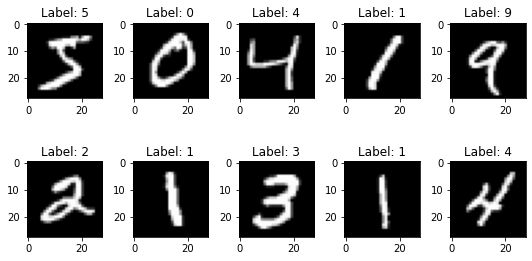

In [ ]:
num_row = 2
num_col = 5# plot images
num = num_row*num_col
images = x_train[:num]
labels = y_train[:num]
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.3452614 ,  0.11011416, -0.3259337 , -0.15740378, -0.16994616,
         0.25620574, -0.52541006,  0.07457556,  0.6556595 , -0.09441056]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.0705113 , 0.11117979, 0.07188738, 0.0850833 , 0.08402281,
        0.1286686 , 0.05888724, 0.107298  , 0.19184619, 0.09061538]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.0505152

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2898 - accuracy: 0.9159
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1392 - accuracy: 0.9584
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1051 - accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0849 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0719 - accuracy: 0.9768


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [ ]:
model.evaluate(x_test,  y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9772


[0.07532904297113419, 0.9771999716758728]

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
import keras
import pandas
import numpy as np

1

In [ ]:
pred = model.predict(x_test)
pred_class = pred.argmax(axis=1)

IndexError: ignored

In [ ]:
pred[5]


array([-5.723796 ,  9.729214 , -6.448127 , -5.2846003, -2.0042443,
       -9.478694 , -7.412816 ,  2.5052269, -2.9696007, -6.5512867],
      dtype=float32)

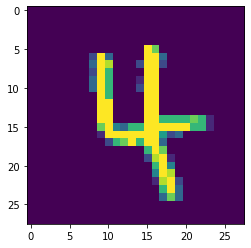

In [ ]:
imgplot = plt.imshow(x_test[668])

In [ ]:
labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
pred_class[668]

4

In [ ]:
index = 0
i = 0
bad_preds = []
while index < 10:
    if (pred_class[i]!=y_test[i]):
        index = index + 1
        bad_preds.append (x_test[i])
    i = i + 1

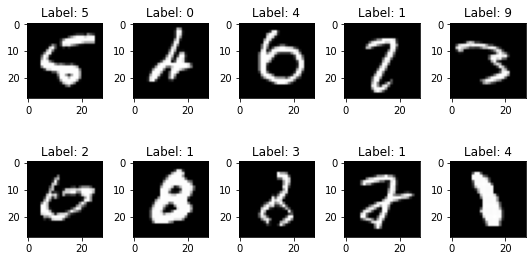

In [ ]:
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(bad_preds[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
pred.shape

(10000, 10)

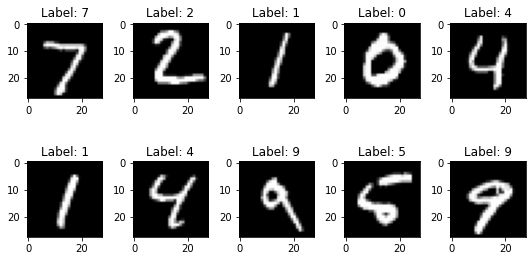

In [ ]:
num_row = 2
num_col = 5# plot images
num = num_row*num_col
images = x_test[:num]
labels = y_test[:num]
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()